## Black friday sale
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.


In [ ]:
# Importing liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [4]:
# Importing test and train data
test=pd.read_csv("black friday test.csv")
train=pd.read_csv("black friday train.csv")
# Combining test and train data 
combined=pd.concat([train,test],ignore_index=False)

In [5]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
# Shape of our data
train.shape, test.shape, combined.shape

((550068, 12), (233599, 11), (783667, 12))

In [7]:
#  What defines the Customer's Purchase Habits...
combined.columns

# Gender, Age, Occupation, Stay in Current City...
# marital status, City Category...

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
# Lets check the Info of the Data
combined.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [153]:
# describe of the data
combined.describe(include= "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


* Age is binned.
* If there is any popular PRODUCT ID - P00265242
* Most of the transactions are done by Males.
* People in the age bracket of 26-35 are purchasing more than the rest.
* People from City Category B are purchasing the most.
* The Purchase Variable has min of $12 and Max of 23961 dollars

In [10]:
# Missing Values
miss = combined.isnull().sum()
percent = combined.isnull().sum()/combined.shape[0]

df = {"Missing Vals":miss, "Percentage":percent}
pd.DataFrame(df).sort_values(by = "Percentage", ascending = False)

,Missing Vals,Percentage
Product_Category_3,545809,0.696481
Product_Category_2,245982,0.313886
Purchase,233599,0.298085
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000


## Visualization

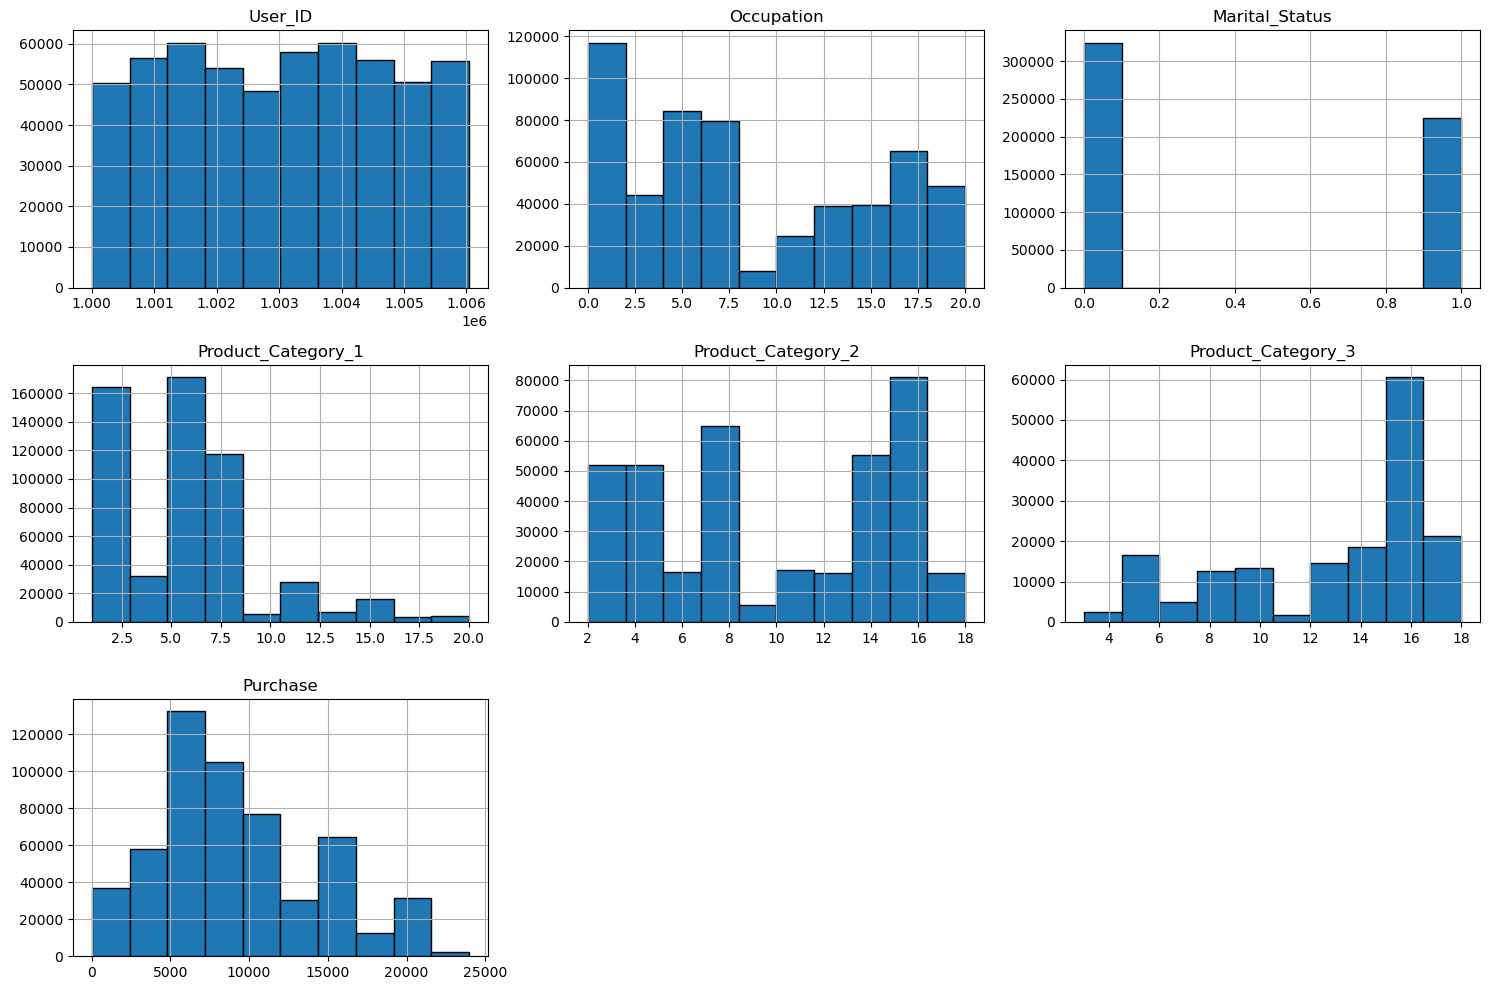

In [11]:
# Lets explore the data...
train.hist(edgecolor="black", figsize = (15, 10))
plt.tight_layout()
plt.show()

* 16 is the most preferred prod_cat for Customers in Prod Cat 3
* Purchase is +vely Skewed.
* Prod_Cat2 - 16, 8 appears to be the preferred ones.

* We will explore this data more...


In [156]:
# Product Category
combined.Product_Category_1.describe()

count    783667.000000
mean          5.366196
std           3.878160
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [157]:
combined.Product_Category_2.describe()

count    537685.000000
mean          9.844506
std           5.089093
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [158]:
combined.Product_Category_1.mode(),
combined.Product_Category_2.mode(), 
combined.Product_Category_3.mode()

0    16.0
Name: Product_Category_3, dtype: float64

* 5, 8 and 16 appear to be the most popular products

In [27]:
# Split the Data in Num and Cat Variables
num_cols = combined.select_dtypes(include = np.number).columns
cat_cols = combined.select_dtypes(exclude = np.number).columns

In [28]:
num_cols

Index(['User_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Stay_In_Current_City'],
      dtype='object')

In [13]:
# Fix the Marital Status
combined["Marital_Status"]=combined.Marital_Status.astype("object")

In [14]:
print(num_cols), print(cat_cols)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


(None, None)

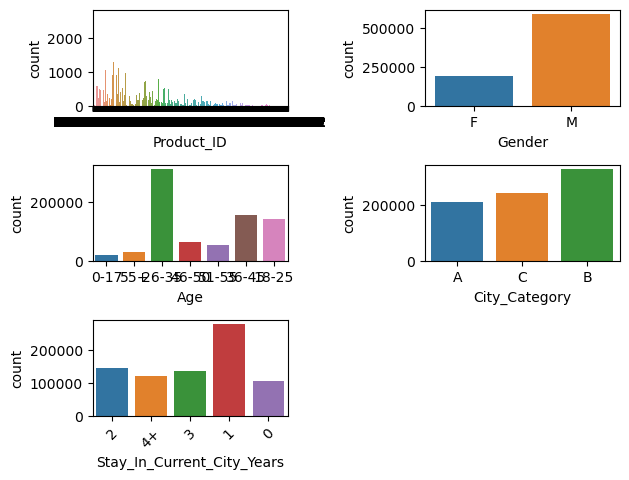

In [20]:
# Plot the Categories...
j=1
for i in cat_cols:
    plt.subplot(3,2,j)
    sns.countplot(data=combined,x=combined[i])
    j=j+1
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
    

* Males are more than females in this data and hence, it is clear that most of the purchase is done by males only.
* The most popular age bracket is 26-35 followed by 36-45
* City Cat B then C followed by A in the descending order of Purchase.
* Most of the people making purchase are Independent of any person in life.
* Most of them have stayed for min 1 year...


### Data Cleaning

In [21]:
# Remove Special Character from Stay and Age
combined['Stay_In_Current_City'] = combined.Stay_In_Current_City_Years.str.strip("+").astype("float")

In [22]:
# Same will done in Age...
combined['Age'] = combined.Age.str.strip("+")

<Axes: xlabel='Age', ylabel='count'>

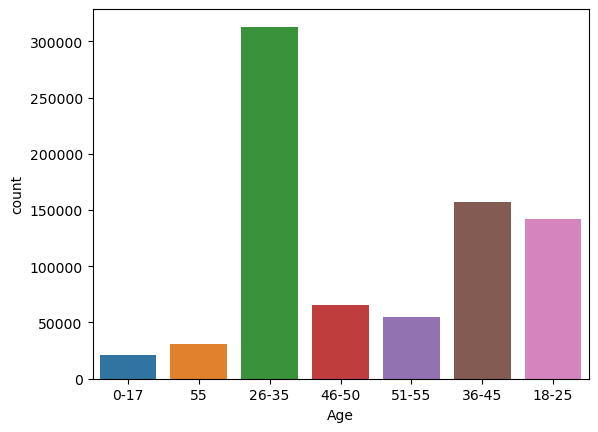

In [23]:
# Check the Age var
sns.countplot(x = "Age", data = combined)

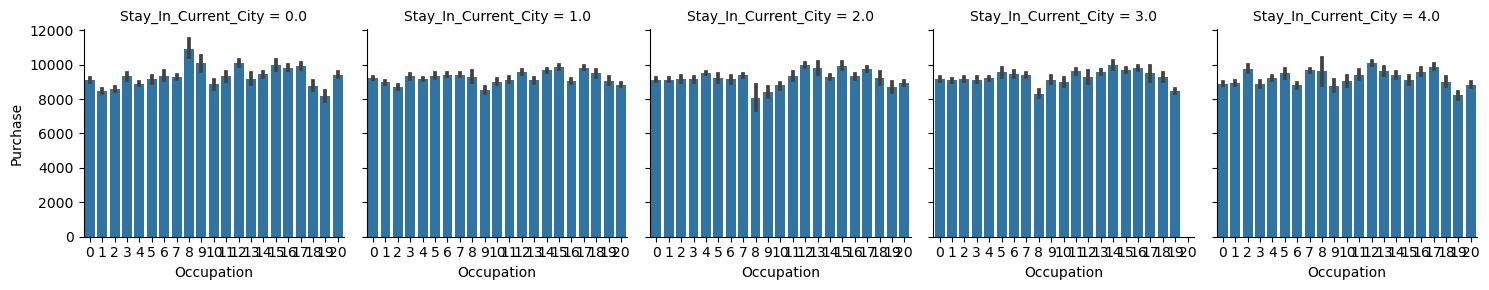

In [24]:
# Stay In City, Marital Status and Occupation has an effect on Tgt Variable...

# FacetGrid Plot

g = sns.FacetGrid(combined, col = "Stay_In_Current_City")
g.map(sns.barplot, "Occupation", "Purchase")
plt.show()

#Inference: that there is no effect on 
#Purchase irrespective of the Marital Status, his stay in current city & Occupation...

<Axes: xlabel='Occupation', ylabel='Purchase'>

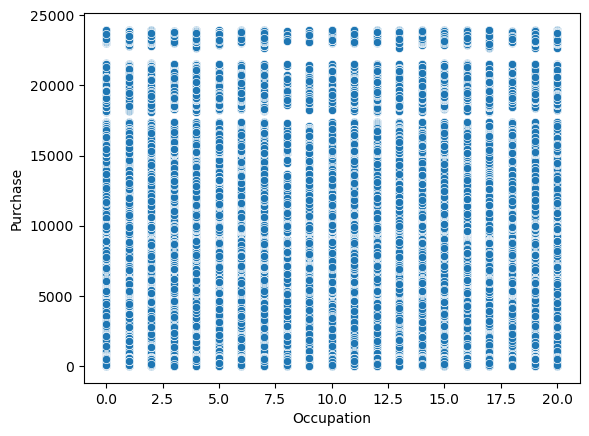

In [26]:
# Check the Occupation vs Purchase
sns.scatterplot(x=combined.Occupation,y=combined.Purchase)

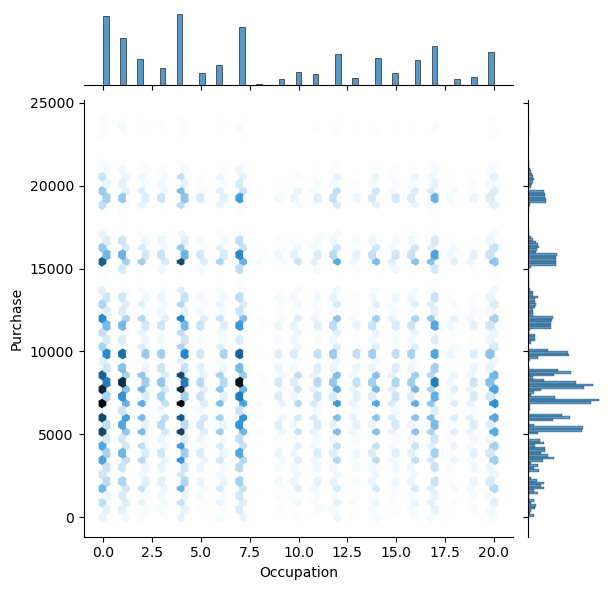

In [29]:
# hexplot or jointplot

sns.jointplot(x = "Occupation", y = "Purchase", data = combined, kind = "hex")
plt.show()

* Most of the Purchase is between 5000-10000 range.
* The Occupation in the range 0-7 have the highest purchase where 4 appears to be the profession where people make the most of the purchases.

#### How this Info can be used
* Company can target Occupations between 0 - 7 and run marketing campaigns to encourage people to buy more.

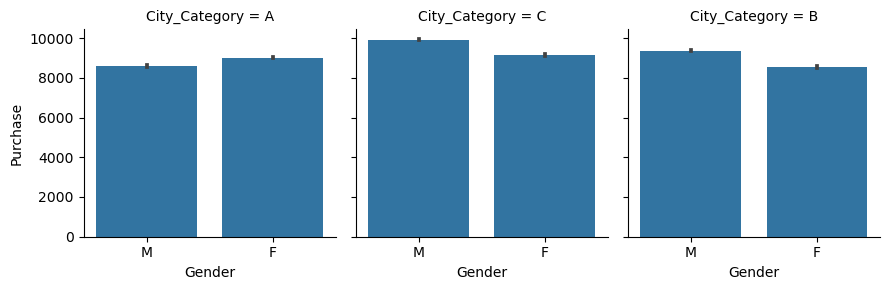

In [30]:
# Check City Category with Gender and Purchase...

g = sns.FacetGrid(combined, col = "City_Category") # Facetgrid Object
g.map(sns.barplot, "Gender", "Purchase") # func, x, y


# We see that City Category C has the highest no of Purchases Witnessed.
# For City Cat B & C, males tend to dominate the Purchase...
# Where as in City A, we see that females are the biggest spenders...

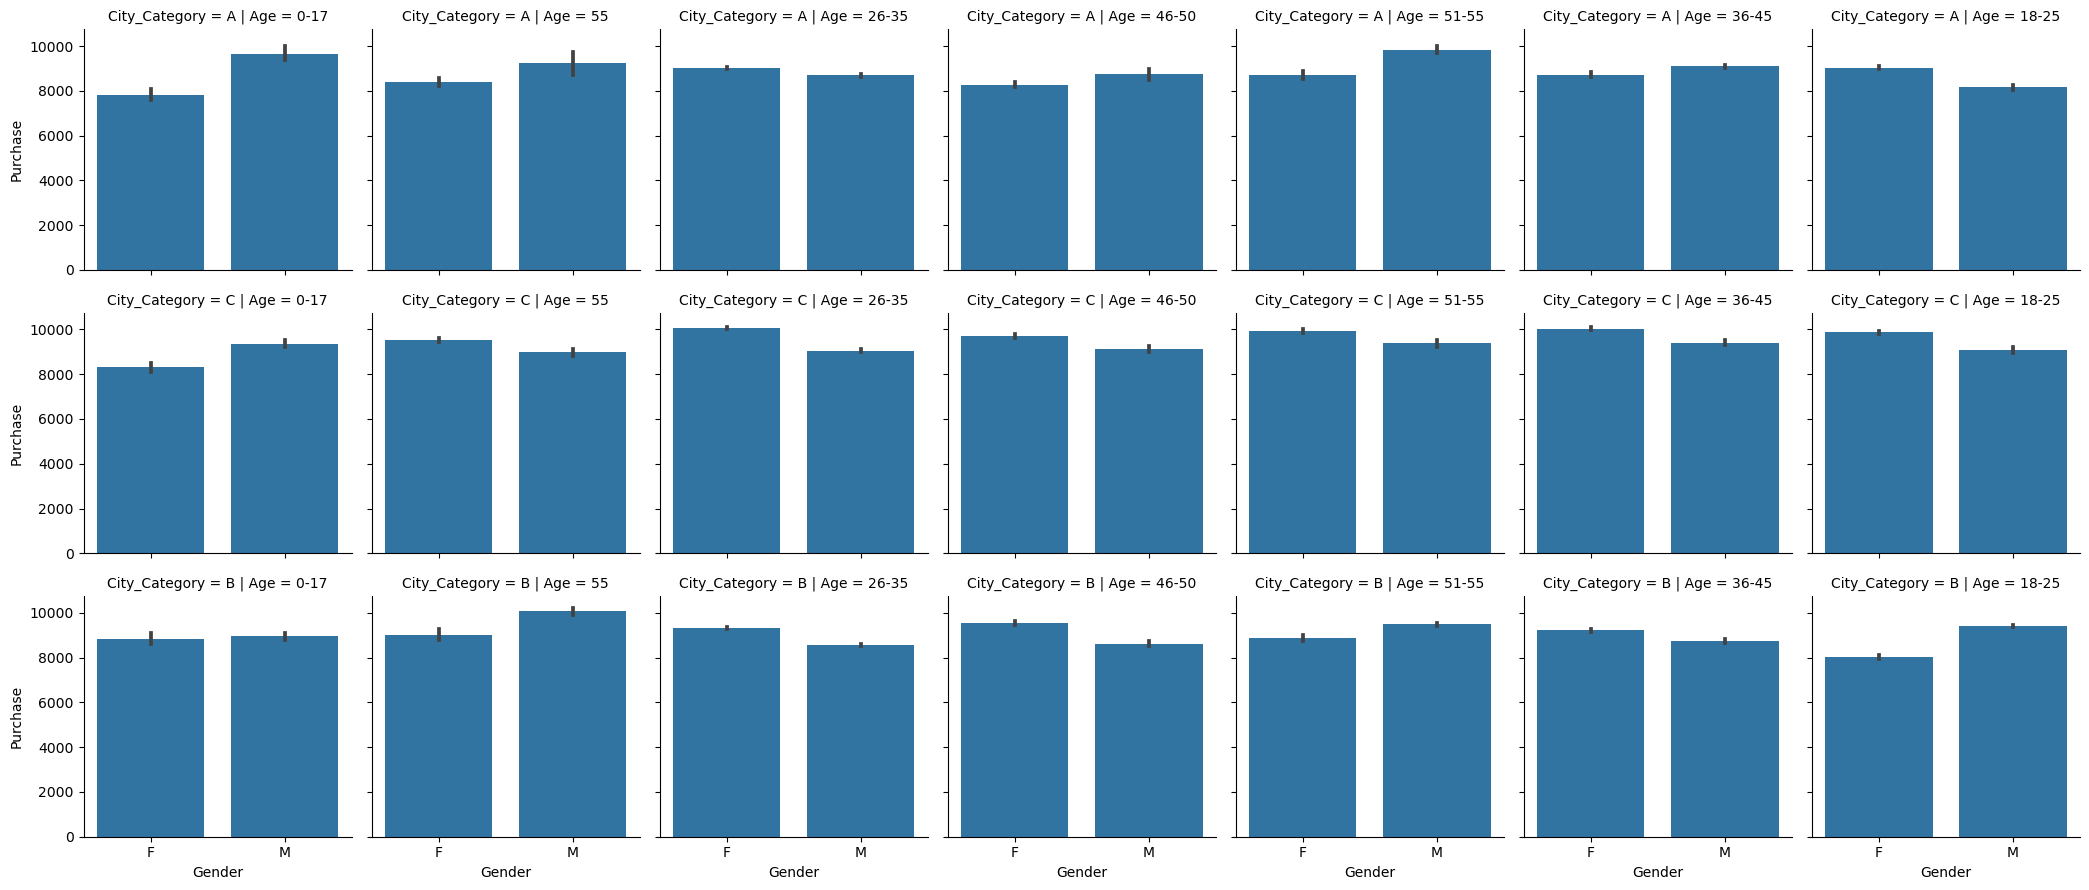

In [31]:
# Age, city category followed by Gender and Purchase.

g = sns.FacetGrid(combined, row = "City_Category", col = "Age") # Facetgrid Object
g.map(sns.barplot, "Gender", "Purchase") # func, x, y
plt.show()

* There are two age groups in the City Cat_A 26-35 and 18-25 for which the females have made lot of purchases.
* We can say that Age Bracket 26-35 and 18-25 in A City are the potential buyers...

In [57]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,2.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,2.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,2.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,2.0
4,1000002,P00285442,M,55,16,C,4+,0,8,NaN,NaN,7969.0,4.0


In [58]:
combined.Product_Category_1.describe()

count    783667.000000
mean          5.366196
std           3.878160
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [32]:
#  Statistical Test to Check the relation between marital stats and product_cat1

# Ho: That Prod Cat is Independent of the Gender
# Ha: That Prod Cat is Dependent on the Gender

import scipy.stats as stats

# Tabulate the Data
tabulate = pd.crosstab(combined.Gender, combined.Product_Category_1)

# Deploy the Test
teststats, pvalue, df, exp_freq = stats.chi2_contingency(tabulate)

# Print the Pvalue
print(pvalue)

0.0


<AxesSubplot:xlabel='Gender'>

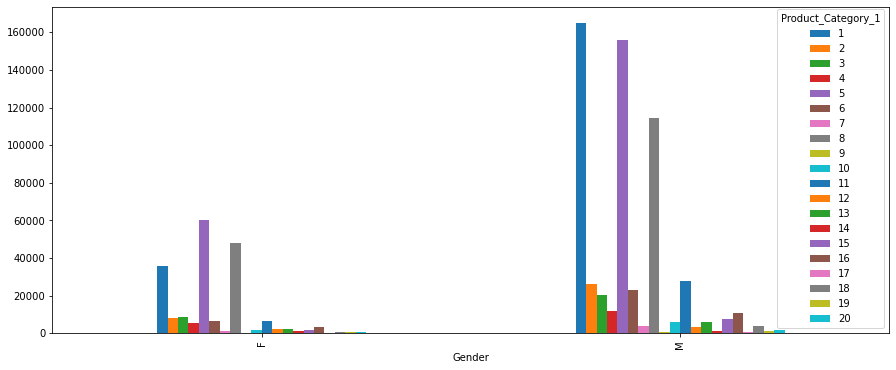

In [168]:
tabulate.plot(kind ="bar")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

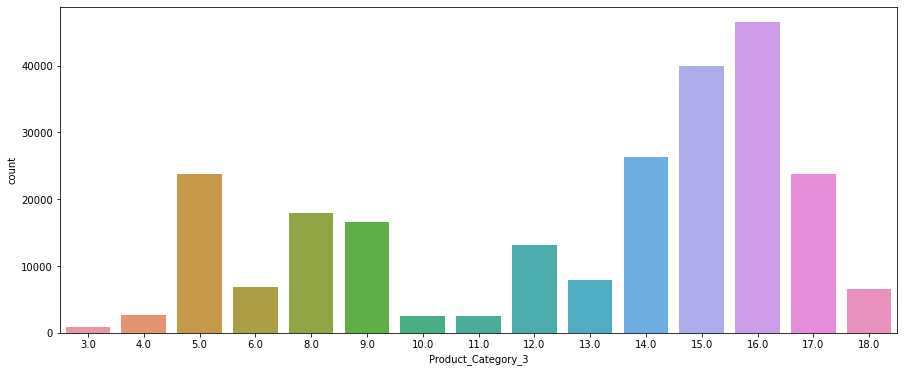

In [169]:
# With Product Category, Take Where the Gender == Male, Product Category median value

sns.countplot(combined.Product_Category_3)

In [33]:
combined.loc[combined.Gender=="F", "Product_Category_3"].describe()

count    53621.000000
mean        12.463475
std          4.125628
min          3.000000
25%          9.000000
50%         14.000000
75%         16.000000
max         18.000000
Name: Product_Category_3, dtype: float64

In [34]:
# Does City Category has any role in Product Category

# Ho: That Prod Cat is Independent of the City Category
# Ha: That Prod Cat is Dependent on the City Category

import scipy.stats as stats

# Tabulate the Data
tabulate = pd.crosstab(combined.City_Category, combined.Product_Category_1)

# Deploy the Test
teststats, pvalue, df, exp_freq = stats.chi2_contingency(tabulate)

# Print the Pvalue
print(pvalue)

0.0


<AxesSubplot:xlabel='City_Category'>

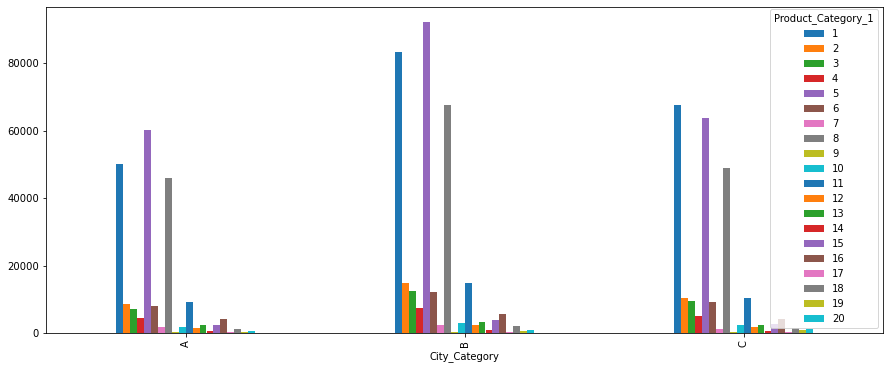

In [78]:
tabulate.plot(kind = "bar")

In [171]:
combined.groupby(["City_Category", "Gender"])["Product_Category_2"].describe()

count       mean       std  min  25%   50%   75%  \
City_Category Gender                                                        
A             F        33582.0  10.124710  4.798571  2.0  6.0  11.0  14.0   
              M       106543.0   9.895713  5.092870  2.0  5.0   9.0  15.0   
B             F        55225.0   9.994006  4.853629  2.0  5.0  10.0  14.0   
              M       169990.0   9.768433  5.148369  2.0  5.0   9.0  15.0   
C             F        42014.0   9.923502  4.950752  2.0  5.0  10.0  14.0   
              M       130331.0   9.740852  5.215808  2.0  5.0   9.0  15.0   

                       max  
City_Category Gender        
A             F       18.0  
              M       18.0  
B             F       18.0  
              M       18.0  
C             F       18.0  
              M       18.0

In [35]:
# Impute the Missing Values in Prod_Cat_2

# City Condition
ca = combined.City_Category=="A"
cb = combined.City_Category=="B"
cc = combined.City_Category=="C"


# Gender
c_m = combined.Gender=="M"
c_f = combined.Gender=="F"

combined.loc[(ca) & (c_m) &(combined["Product_Category_2"].isnull()), 
             "Product_Category_2"] = 9.0

combined.loc[(ca) & (c_f) &(combined["Product_Category_2"].isnull()), 
             "Product_Category_2"]=11.0

combined.loc[(cb) & (c_m) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=9.0

combined.loc[(cb) & (c_f) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=10.0

combined.loc[(cc) & (c_m) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=9.0
combined.loc[(cc) & (c_f) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=10.0

In [36]:
combined.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
Stay_In_Current_City               0
dtype: int64

In [37]:
# Imputate the missing value in catergory 2
ca=combined.City_Category=='A'
cb=combined.City_Category=='B'
cc=combined.City_Category=='C'

# Gender
c_m=combined.Gender=='M'
c_f=combined.Gender=='F'

combined.loc[(ca) & (c_m) &(combined["Product_Category_3"].isnull()), 
             "Product_Category_3"] = 15.0

combined.loc[(ca) & (c_f) &(combined["Product_Category_3"].isnull()), 
             "Product_Category_3"]=14.0

combined.loc[(cb) & (c_m) &(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=15.0

combined.loc[(cb) & (c_f)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=14.0

combined.loc[(cc) & (c_m)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=15.0

combined.loc[(cc) & (c_f)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=14.0

In [38]:
combined.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
Stay_In_Current_City               0
dtype: int64

In [116]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City
0,1000001,P00069042,F,0-17,10,A,2,0,3,11.0,14.0,8370.0,2.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,2.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,11.0,14.0,1422.0,2.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057.0,2.0
4,1000002,P00285442,M,55,16,C,4+,0,8,9.0,15.0,7969.0,4.0


In [39]:
# Top5 Products
prod = combined.Product_ID.value_counts().index[:5]

In [40]:
def products(x):
    if x in prod:
        return("Top5")
    else:
        return("Others")

In [41]:
combined["Prod_ID"] = combined.Product_ID.apply(products)

<Axes: xlabel='Prod_ID', ylabel='Purchase'>

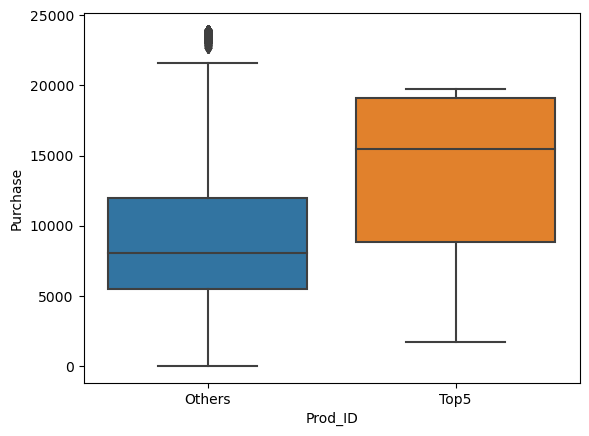

In [42]:
sns.boxplot(x = "Prod_ID", y = "Purchase", data = combined)

### Dropping the Unnecessary Variables

In [43]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'Stay_In_Current_City', 'Prod_ID'],
      dtype='object')

In [44]:
new = combined.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis = 1)

In [45]:
new.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City,Prod_ID
0,F,0-17,10,A,0,3,11.0,14.0,8370.0,2.0,Others
1,F,0-17,10,A,0,1,6.0,14.0,15200.0,2.0,Others
2,F,0-17,10,A,0,12,11.0,14.0,1422.0,2.0,Others
3,F,0-17,10,A,0,12,14.0,14.0,1057.0,2.0,Others
4,M,55,16,C,0,8,9.0,15.0,7969.0,4.0,Others


In [183]:
new.Age.unique()

array(['0-17', '55', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)